# Transformerのアルゴリズム

## 概要

[Vaswani, et al. (2017). Attention is all you need.](https://arxiv.org/pdf/1706.03762.pdf) で提案されたDeep Learningの新しいアーキテクチャ。

提案されものはEncoder-Decoder型。

GPTシリーズはDecoderのみでもっとシンプル


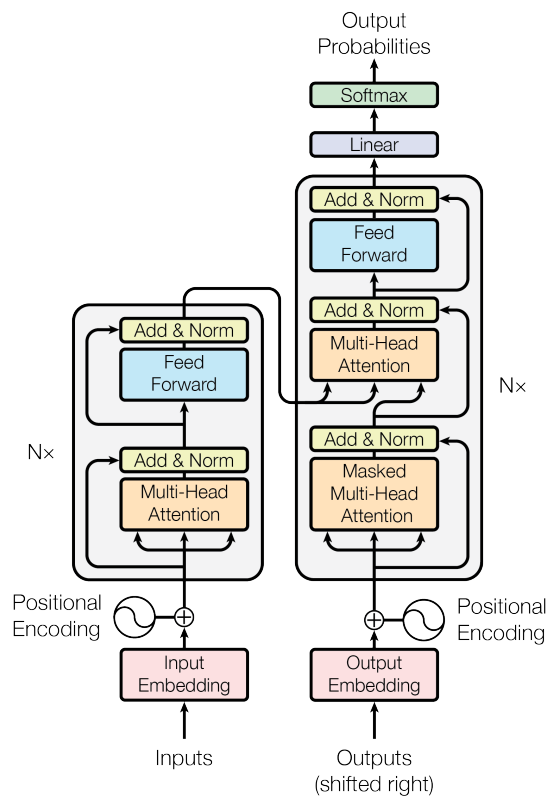

## 処理の流れ

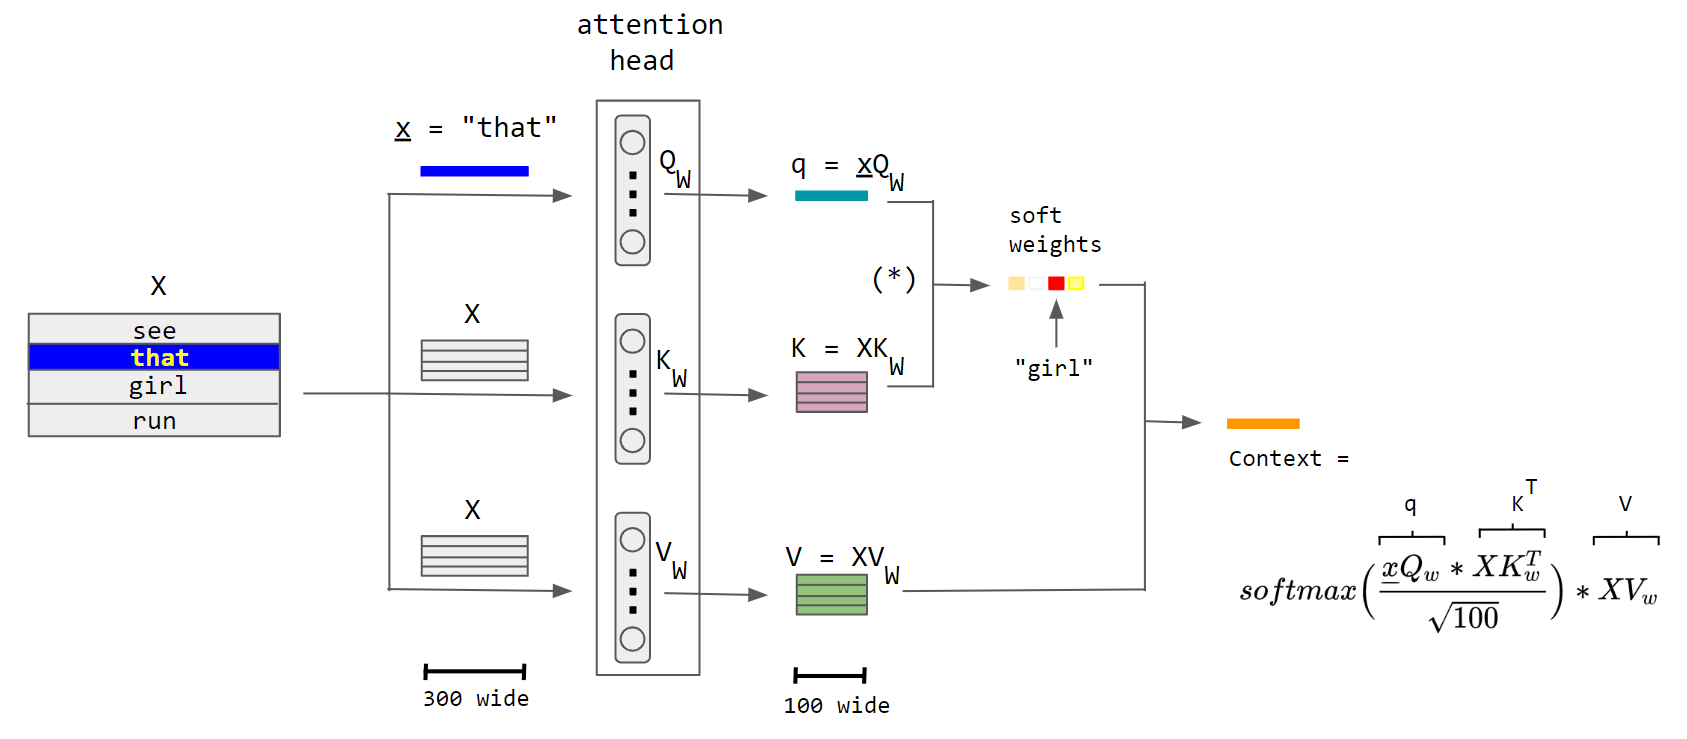

出所：[Attention (machine learning) - Wikipedia](https://en.wikipedia.org/wiki/Attention_(machine_learning))

## Attention

Attentionでは、入力の埋込$\boldsymbol{x}_i$に対して文脈の情報を追加したベクトル$\boldsymbol{x}_i'$を再構築していく。

このベクトル$\boldsymbol{x}_i'$は、各トークンの埋め込みから計算されたバリューベクトルたち$\boldsymbol{v}_1, \boldsymbol{v}_2, \dots, \boldsymbol{v}_d$に対して、どのトークンのバリューに注意を払うべきかの重み$a_1, a_2, \dots, a_d$を用いて重み付け和にしたものである。

$$
\boldsymbol{x}_i' = a_1 \boldsymbol{v}_1 + a_2 \boldsymbol{v}_2 + \cdots + a_d \boldsymbol{v}_d
$$

重み$a_1, a_2, \dots, a_d$はキー$k$とクエリ$q$から計算された類似度のスコア$s$をsoftmaxにかけて合計1がになるように正規化したもの

$$
s_{ij} = \frac{\boldsymbol{q}^T_i \boldsymbol{k}_j}{\sqrt{d}}
$$

$$
\begin{align}
(a_1, a_2, \dots, a_d)
  &= \text{softmax}( \boldsymbol{s}_i ) \\
  &= \left(
    \frac{ \exp(s_{i1}) }{ \sum^p_{j = 1} \exp(s_{ij}) }, \dots, \frac{ \exp(s_{ip}) }{ \sum^p_{j = 1} \exp(s_{ij}) }
  \right)
\end{align}
$$

### inputs

単語埋め込み（word embedding）が入力となる。この分散表現も他のパラメータと同時に学習される

### Positional Encoding

例えば翻訳を行うとき、入力と出力の系列のどのトークンがどの位置で入力されたのかを示す情報を付与する必要がある。

特に、Attentionは順番の変化に頑健（$x_1$と$x_2$を入れ替えても、$y_1$と$y_2$が元のそれと入れ替えた状態になり、入出力を集合とみなせば等価である）であるが、言語処理では系列性を評価したいため、位置情報を含める。

具体的には三角関数により位置をエンコーディングする

特徴要素の位置が偶数（$2i$）のときは$\sin$、奇数（$2i+1$）のときは$\cos$を使う。$d_{embed}$は埋め込みの次元数である

$$
PE(pos, 2i) = \sin \left( \frac{pos}{ 10000^{ \frac{2i}{d_{embed}}} } \right)\\
PE(pos, 2i+1) = \cos \left( \frac{pos}{ 10000^{ \frac{2i}{d_{embed}}} } \right)
$$

### Positional Embedding

GPTではこちらを利用


### Scaled Dot-Product Attention

入力埋込に文脈の情報を付与していく。

Q, K, Vはいずれも入力$\boldsymbol{X} \in \mathbb{R}^{n_{max} \times d_{embed}}$から変換されたもの。$n_{max}$はトークンの最大長、$d_{embed}$は埋め込み次元数

$$
Q = X W^Q\\
K = X W^K\\
V = X W^V
$$

重み$W^Q, W^K, W^V$は学習して推定していく。self-attentionだとsource = targetなので入力のベクトルを再現するように重みを推定するっぽい？

$$
Q, K, V \in \mathbb{R}^{n_{max} \times d_{embed}}
$$

$$
s_{ij} = \boldsymbol{q}_i ^\top \boldsymbol{k}_j
= \sum^{d_{embed}}_{l = 1} q_{il} k_{jl}
$$

$$
a_j = \text{softmax}\left( \frac{ s_{ij} }{ \sqrt{ d_{embed} } } \right)
= \frac{1}{ \sqrt{ d_{embed} } } \frac{ \exp(s_{ij}) }{ \sum^n_{j=1} \exp(s_{ij}) }
$$


In [15]:
import numpy as np

n, d = 5, 3
np.random.seed(0)
Q = np.random.normal(size=(n, d))
K = np.random.normal(size=(n, d))

def softmax(x):
    return np.exp(x) / np.exp(x).sum()

S = (Q @ K.T) / d # Sはn*n行列
A = np.apply_along_axis(softmax, 0, S).round(3)
A

array([[0.173, 0.105, 0.163, 0.301, 0.24 ],
       [0.432, 0.384, 0.447, 0.206, 0.189],
       [0.129, 0.284, 0.152, 0.209, 0.112],
       [0.127, 0.065, 0.1  , 0.123, 0.289],
       [0.139, 0.162, 0.138, 0.16 , 0.17 ]])

In [8]:
V = np.random.normal(size=(n, d))
A @ V

array([[-0.48113832,  0.37745091, -0.75004649],
       [-0.52850805,  0.71992637, -0.88546848],
       [-0.60983733,  0.13207693, -0.48285972],
       [-0.5163397 ,  0.58045241, -0.46327048],
       [-0.46800559,  0.32599458, -0.46536853]])

## 参考
- [Simple Self-Attention from Scratch](https://cran.r-project.org/web/packages/attention/vignettes/simple_attention.html)
- [Attention and the Transformer · 深層学習](https://atcold.github.io/pytorch-Deep-Learning/ja/week12/12-3/)
- [Understanding and Coding the Self-Attention Mechanism of Large Language Models From Scratch](https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html)


$$
\text{Attention}(Q, K, V)
= \text{softmax}
\left(
    \frac
    { Q K^T }
    { \sqrt{d_k} }
\right)
V
$$

単純化のためQ, Kの行列からベクトルをとってきて示すことにする。qとkの内積

内積は類似度に使われる（cf. コサイン類似度）

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\text{softmax}
\left(
    \frac{\b{q} \cdot \b{k}}
    {\sqrt{d}}
\right)
$$

これは

1. クエリ$\b{q}$とキー$\b{k}$の内積（＝類似度）を計算する
2. 次元数$d$によって正規化する（内積は次元数が多いほど値も大きくなるので）
3. softmaxによって確率値へと値の範囲を整える

という処理になる。いわば確率ベクトルを返すようなものになる。

例えば$i$番目のトークンだけこの出力値が1だとして、ほかが0だとすると、$V$の$i$番目のベクトルだけが出力となる

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{v}_i = (v_1, \cdots, v_d)
\\
\b{V} = 
\begin{pmatrix}
    \b{v}_1\\
    \b{v}_2\\
    \vdots\\
    \b{v}_n
\end{pmatrix}
\\
\b{p} = (p_1, \cdots, p_n) = 
\text{softmax}
\left(
    \frac{\b{q} \cdot \b{k}}
    {\sqrt{d}}
\right)
$$

とする

$$
\begin{align}
\b{p} \b{V}
&=  (p_1, \cdots, p_n)
\begin{pmatrix}
    v_{11} & \cdots & v_{1d}\\
    \vdots & \ddots & \vdots\\
    v_{n1} & \cdots & v_{nd}\\
\end{pmatrix}
\\
&= 
\begin{pmatrix}
    p_1 v_{11} + \cdots + p_n v_{n1},\
    \cdots, \
    p_1 v_{1d} + \cdots + p_n v_{nd}
\end{pmatrix}
\\
&= p_1 (v_{11}, \cdots, v_{1d}) + \cdots + p_n (v_{n1}, \cdots, v_{nd})
\\
&= \sum_i^n p_i \b{v}_i
\end{align}
$$

### Multi-head attention

元のベクトルを等分割して複数のattentionに通す。

multiにするメリットは

1. 並列計算可能になる
2. ソフトマックスはexpが入っていて極端な値になりやすい → 単一のattentionではなく複数使うことで、複数の観点から評価する（アンサンブル的な？


### 

## Attentionの可視化

トークン間の距離を可視化。

[AttentionViz Docs](https://catherinesyeh.github.io/attn-docs/)

動かせるデモサイトあり

## 参考文献

- [Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in neural information processing systems, 30.](https://arxiv.org/pdf/1706.03762.pdf)
- [30分で完全理解するTransformerの世界](https://zenn.dev/zenkigen/articles/2023-01-shimizu#%E6%A7%8B%E9%80%A0%E7%9A%84%E3%81%AA%E8%A9%B1)
- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
  - 和訳：[イラストでみるTransformer](https://tips-memo.com/translation-jayalmmar-transformer)
- [Encoder-Decoder ネットワーク [ディープラーニングの文脈で] | CVMLエキスパートガイド](https://cvml-expertguide.net/terms/dl/encoder-decoder/)
- [【深層学習】Transformer - Multi-Head Attentionを理解してやろうじゃないの【ディープラーニングの世界vol.28】#106 #VRアカデミア #DeepLearning - YouTube](https://www.youtube.com/watch?v=50XvMaWhiTY)
- [BERT以降の事前学習済みモデルのトレンドと主要モデルを紹介！ Part 1 学習方法編 - ELYZA Tech Blog](https://elyza-inc.hatenablog.com/entry/2021/03/25/160727#:~:text=In%2Dcontext%20Learning%E3%81%A8%E3%81%AF,%E3%81%A7%E5%AD%A6%E7%BF%92%E3%81%99%E3%82%8B%E3%81%93%E3%81%A8%E3%81%A7%E3%81%99%E3%80%82)